In [1]:
import os
import numpy as np
from datetime import datetime
from skimage.io import imread
from matplotlib.pyplot import imshow, imsave
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
side_1 = 900
centers_1 = {
    "lettuce5": (1720, 470),
    "lettuce6": (1000, 880), 
    "lettuce7": (1770, 1390),
    "lettuce8": (1000, 1860),
    "lettuce1": (950, 2730),
    "lettuce2": (1780, 3130),
    "lettuce3": (900, 3640),
    "lettuce4": (1800, 4100)
}
side_2 = 700
centers_2 = {
    "lettuce1": (910, 1020),
    "lettuce2": (1600, 1290), 
    "lettuce3": (950, 1700),
    "lettuce4": (1650, 1960),
    "lettuce5": (1670, 2600),
    "lettuce6": (1020, 2850),
    "lettuce7": (1750, 3250),
    "lettuce8": (1120, 3680)
}

breakpoint = datetime(year=2024, month=7, day=4, hour=15)

In [3]:
read_folder = "data/daylight_images"
write_folder = "data/daylight_preprocessed_images"

In [ ]:
files = sorted(os.listdir(read_folder))

for filename in tqdm(files):
    if filename.endswith(".jpg"):
        # Split the filename by "_" and extract the required components
        plant_name, date_components, time_components = filename.split("_")
        year, month, dom = [int(p) for p in date_components.split("-")]
        hour = int(time_components.split("%")[0])
        timestamp = datetime(year=year, month=month, day=dom, hour=hour)
    
        # Read the image
        read_path = os.path.join(read_folder, filename)
        im = imread(read_path)
        
        if timestamp > breakpoint:
            side = side_2
            centers = centers_2
        else:
            side = side_1
            centers = centers_1
        for i in range(1, 9):
            y, x = centers[f"lettuce{i}"]
            plant_img = im[y - side // 2:y + side // 2, x - side // 2:x + side // 2, :]
            
            plant_img_name = f"lettuce{i}_" + timestamp.strftime("%Y-%m-%d_%H") + ".jpg"
            write_path = os.path.join(write_folder, plant_img_name)
            imsave(write_path, plant_img)

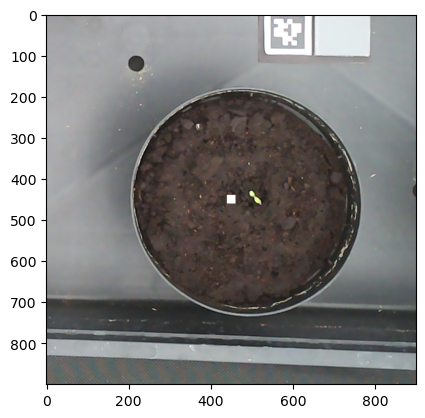

In [18]:
# files = sorted(os.listdir(read_folder))
# im = imread(os.path.join(read_folder, files[1]))

# side = 900
# y, x = centers_1["lettuce2"]

# img = np.copy(im)
# for i in range(-10, 11):
#     for j in range(-10, 11):
#         img[y + i][x + j] = 255
# imshow(img[y - side // 2:y + side // 2, x - side // 2:x + side // 2, :])

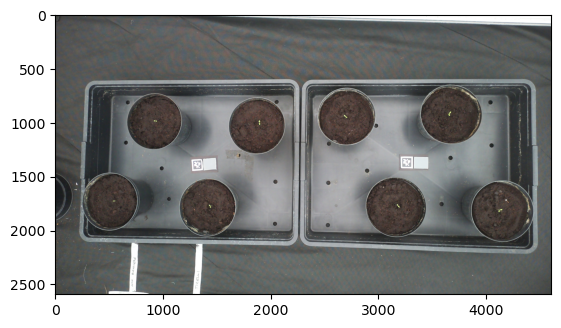

In [15]:
# imshow(im)